# House Prices project
With this project I want to explore more ML concepts, algorithms and methods. Furthermore I want to consolidate what I learnt in previous projects.
This project will be composed in EDA, Preprocessing, Feature Engineering, FastAPIs and Dockerization.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.stats import skew
import seaborn as sns
import sys
!{sys.executable} -m pip install xgboost -q

In [2]:
## load data into df
houses_train_df = pd.read_csv("train.csv")
houses_test_df = pd.read_csv("test.csv")

In [3]:
houses_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
houses_train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
houses_train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
houses_train_df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [7]:
missing = houses_train_df.isnull().sum()
missing_pct = (missing/ len(houses_train_df)) * 100
missing_df = pd.DataFrame({'missing': missing, 'percent': missing_pct})
missing_df[missing_df['missing']>0].sort_values('percent', ascending=False)

,missing,percent
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
MasVnrType,872,59.726027
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


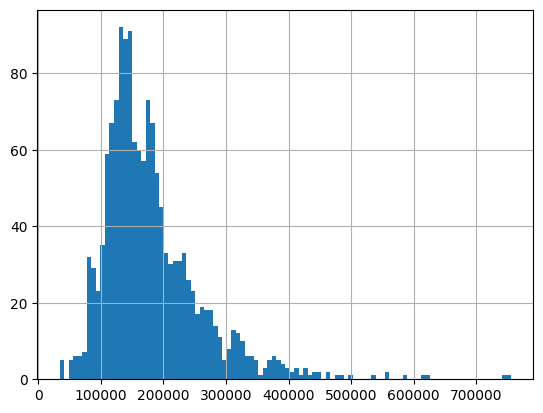

In [8]:
sale_prices_hist = houses_train_df['SalePrice'].hist(bins=100)
os.makedirs("figures", exist_ok=True)
plt.savefig("figures/sale_prices_hist.png", format="png")

In [9]:
numeric_cols = houses_train_df.select_dtypes(include=[np.number]).columns
categorical_cols = houses_train_df.select_dtypes(include=['object']).columns
print(f"Numeric: {len(numeric_cols)}, Categorical: {len(categorical_cols)}")

Numeric: 38, Categorical: 43


In [10]:
# Evaluate correlation with target (top predictors)
correlations = houses_train_df.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)
correlations.head(10)  # Top 10 correlated features

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

In [11]:
print(f"SalePrice skewness: {skew(houses_train_df['SalePrice']):.2f}")

SalePrice skewness: 1.88


In [12]:
# RIMOSSO: SalePrice_log causava data leakage (finiva in X)
# Non serve crearlo qui, viene fatto direttamente nel train/test split

In [13]:
# RIMOSSO: HouseAge duplicata
# Viene creata correttamente nella cella di Feature Engineering

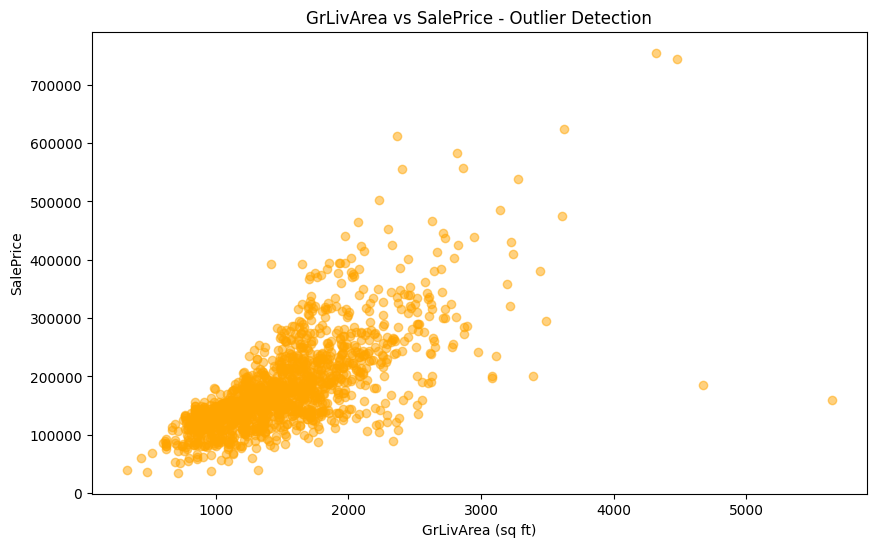

In [14]:
plt.figure(figsize=(10,6))
plt.scatter(houses_train_df['GrLivArea'], houses_train_df['SalePrice'], alpha=0.5, color='Orange')
plt.xlabel('GrLivArea (sq ft)')
plt.ylabel('SalePrice')
plt.title('GrLivArea vs SalePrice - Outlier Detection')
plt.savefig('figures/grlivArea_vs_saleprice.png', format='png')
plt.show()

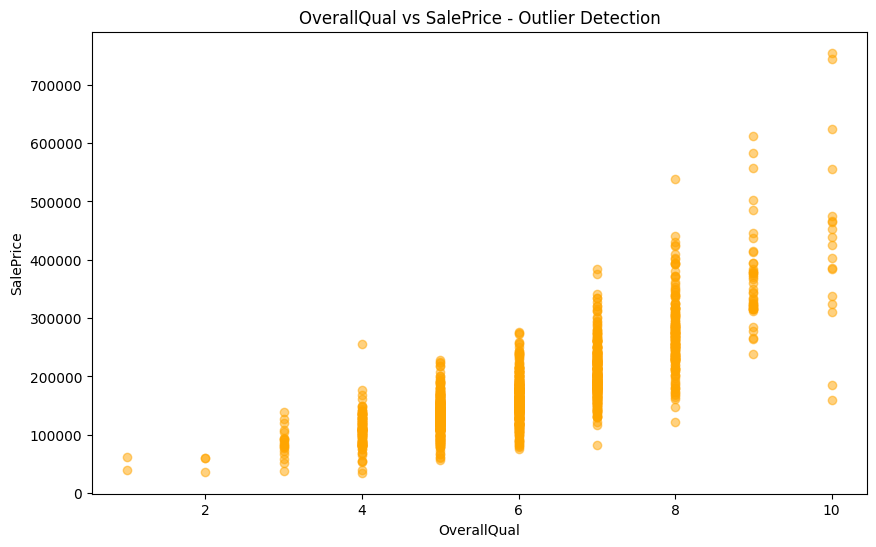

In [15]:
plt.figure(figsize=(10,6))
plt.scatter(houses_train_df['OverallQual'], houses_train_df['SalePrice'], alpha=0.5, color='Orange')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.title('OverallQual vs SalePrice - Outlier Detection')
plt.savefig('figures/overallqual_vs_saleprice.png', format='png')
plt.show()

In [16]:
## Remouve previous outliers >4000 GrLivArea
houses_train_df = houses_train_df[~((houses_train_df['GrLivArea']>4000) & (houses_train_df['SalePrice']<3000000))]

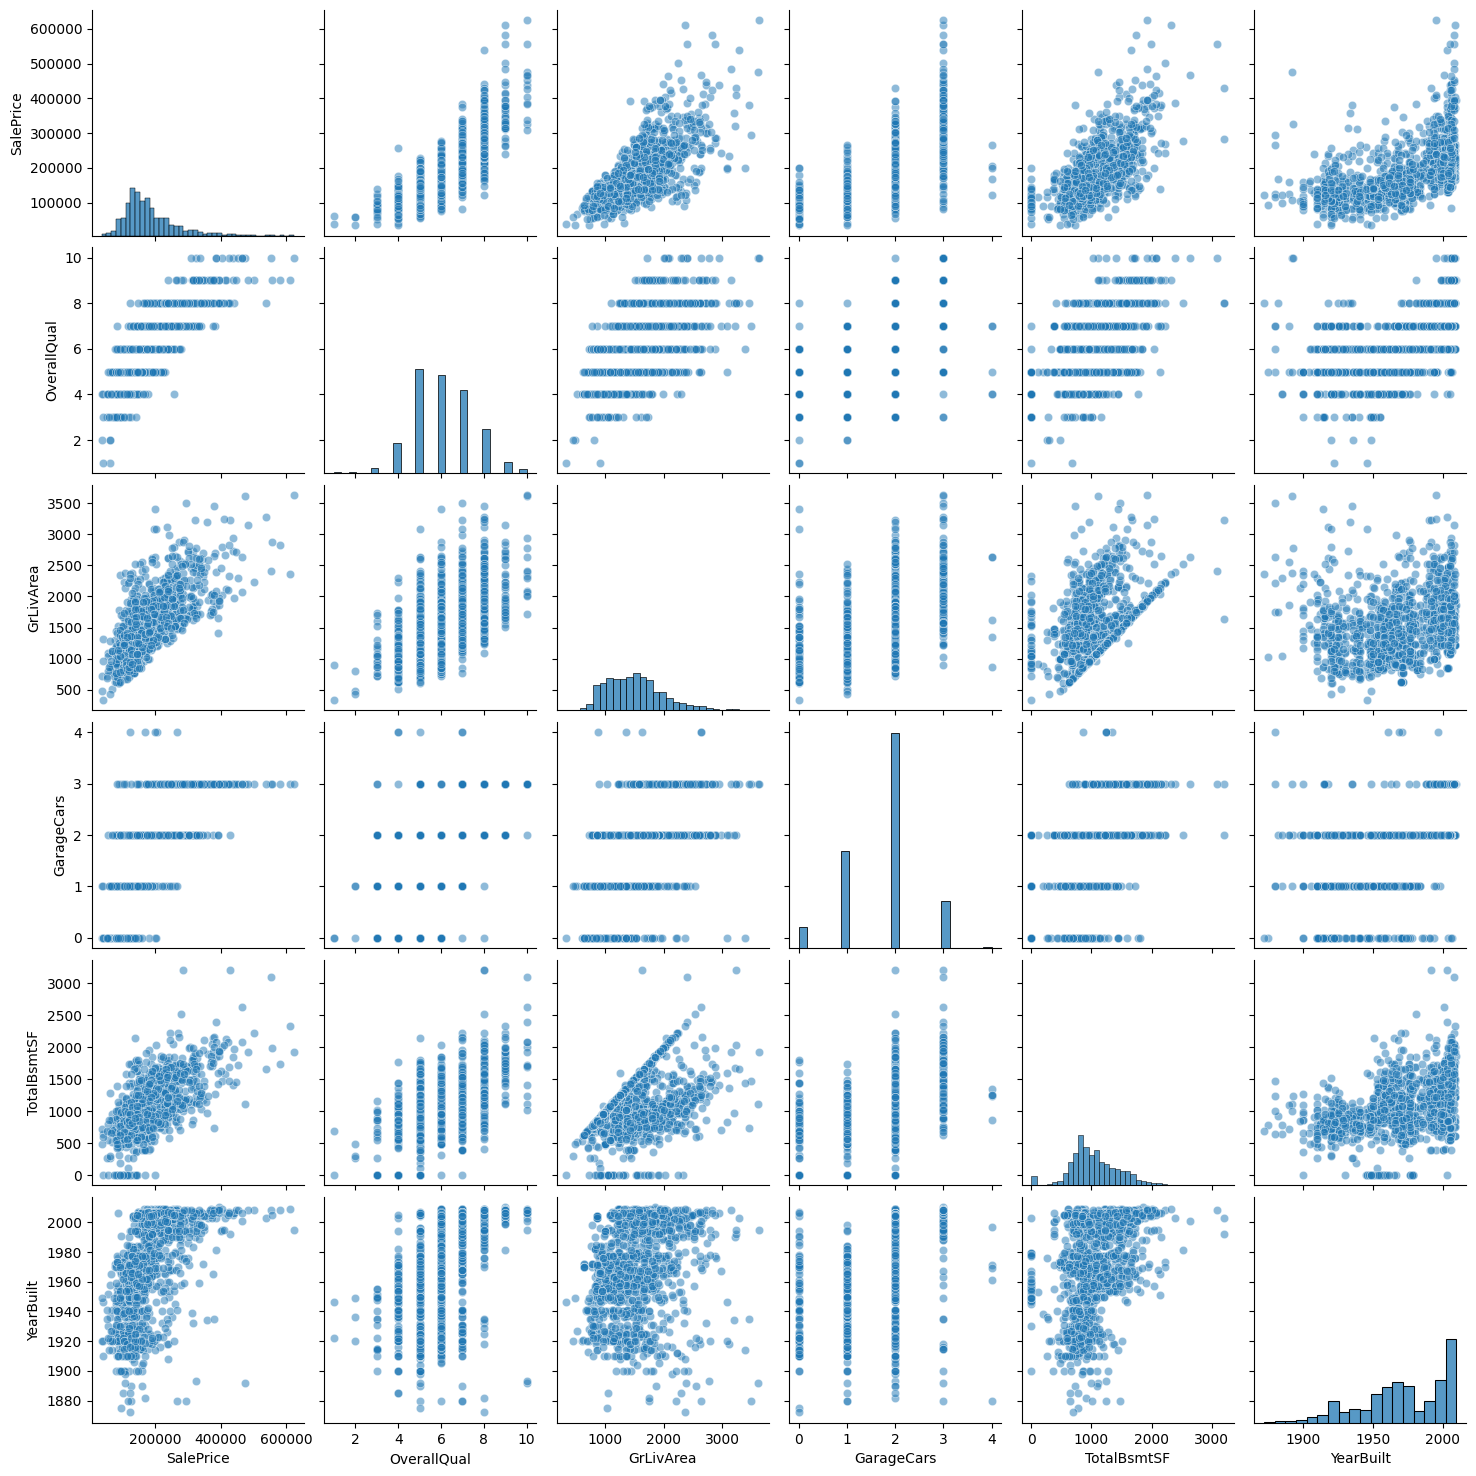

In [17]:
top_features = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt']
sns.pairplot(houses_train_df[top_features], diag_kind='hist', plot_kws={'alpha': 0.5})
plt.savefig('figures/pairplot_top_features.png')
plt.show()

## Data Qaulity Assestment
The dataset is composed by 1460 rows with 81 columns each. The dtypes within the dataset are float, int and object (string or others): This means that we will need to handle features with scalers, one-hot-encoding and other techniques. Well, there are also columns with lot of missing values like `Alley`,`PoolQC`, `MiscFeature`, etc. which probably will be deleted or may be influent for the regression task. The datset can be entirely handled by my pc since I have 64GB of RAM available.

From `describe()` method it is evident that:
- `SalePrice` has std() ~79K and mean() ~181K which means high variance since ~66% of houses has a price between 181+-79k.
- `PoolArea` has 75th percentile == 0 which means that there are few houses with pool
- `YearBuilt` has range 1872-2010 which means that binning is needed or feature 'age'
 
Anyway for the moment which column is more important for the regression task cannot be assessed considering that of course there are columns that may point to more expensive or cheaper houses either.

Another interesting aspect is that the distribution of `SalePrice` is basically unimodal, with one peak around 180K, and skewed trhoug low prices. There are outliers >500K though. 

## Outlier Detection

GrLivArea shows strong positive correlation with SalePrice. Scatter plot reveals 2 anomalous data points: houses with >4000 sqft selling for <200K. These will be removed before modeling as they likely represent forced sales or data errors.

## Feature Analysis: OverallQual

OverallQual shows the strongest correlation with SalePrice (~0.79). The relationship is clearly monotonic with no anomalous outliers. Variance increases at higher quality levels, which is expected behavior for premium properties.

# Preprocessing
In this section I'll handle missing values, perform categorical encoding, train/test split and create a preprocessing pipeline.

In [18]:
# Missing values handling
missing = houses_train_df.isnull().sum()
missing_pct = (missing / len(houses_train_df)) * 100
missing_df = pd.DataFrame({'missing':missing, 'percentage':missing_pct})
missing_sorted = missing_df[missing_df['missing']>0].sort_values('percentage', ascending=False)
print(f"Columns with missing values: {len(missing_sorted)}")
print(f"Total missing: {houses_train_df.isnull().sum().sum()}")
print(missing_sorted)

Columns with missing values: 19
Total missing: 7815
              missing  percentage
PoolQC           1451   99.656593
MiscFeature      1402   96.291209
Alley            1365   93.750000
Fence            1176   80.769231
MasVnrType        871   59.821429
FireplaceQu       690   47.390110
LotFrontage       259   17.788462
GarageType         81    5.563187
GarageYrBlt        81    5.563187
GarageFinish       81    5.563187
GarageQual         81    5.563187
GarageCond         81    5.563187
BsmtExposure       38    2.609890
BsmtFinType2       38    2.609890
BsmtQual           37    2.541209
BsmtCond           37    2.541209
BsmtFinType1       37    2.541209
MasVnrArea          8    0.549451
Electrical          1    0.068681


In [19]:
cols_to_drop = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']
houses_train_df = houses_train_df.drop(columns=cols_to_drop)
print(f"Dropped {len(cols_to_drop)} columns: {cols_to_drop}")
print(f"Shape after drop: {houses_train_df.shape}")

Dropped 5 columns: ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']
Shape after drop: (1456, 76)


In [20]:
cat_fill_none = [
    'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
    'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
    'MasVnrType'
]

for col in cat_fill_none:
    houses_train_df[col] = houses_train_df[col].fillna("None")

print(f"Filled {len(cat_fill_none)} categorical columns with 'None'")
print(f"Missing left: {houses_train_df.isnull().sum().sum()}")

num_fill_zero = [
    'GarageYrBlt', 'GarageArea', 'GarageCars', 'MasVnrArea',
    'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
    'BsmtFullBath', 'BsmtHalfBath'
]

for col in num_fill_zero:
    houses_train_df[col] = houses_train_df[col].fillna(0)

print(f"Filled {len(num_fill_zero)} numeric columns with 0")
print(f"Missing left: {houses_train_df.isnull().sum().sum()}")

lot_frontage_median = houses_train_df['LotFrontage'].median()
houses_train_df['LotFrontage'] = houses_train_df['LotFrontage'].fillna(lot_frontage_median)
print(f"\nLotFrontage filled with median: {lot_frontage_median}")
print(f"Missing left: {houses_train_df.isnull().sum().sum()}")

electrical_mode = houses_train_df['Electrical'].mode()[0]
houses_train_df['Electrical'] = houses_train_df['Electrical'].fillna(electrical_mode)
print(f"Electrical filled with mode: {electrical_mode}")
print(f"Missing left: {houses_train_df.isnull().sum().sum()}")

total_missing = houses_train_df.isnull().sum().sum()
print(f"\n=== FINAL CHECK ===")
print(f"Total missing: {total_missing}")
print(f"Dataset shape: {houses_train_df.shape}")

if total_missing == 0:
    print("All missing values handled!")
else:
    remaining = houses_train_df.isnull().sum()
    print("Columns still with missing:")
    print(remaining[remaining > 0])

Filled 10 categorical columns with 'None'
Missing left: 349
Filled 10 numeric columns with 0
Missing left: 260

LotFrontage filled with median: 69.0
Missing left: 1
Electrical filled with mode: SBrkr
Missing left: 0

=== FINAL CHECK ===
Total missing: 0
Dataset shape: (1456, 76)
All missing values handled!


In [21]:
# Feature engineering and featorue encoding

# New age feature
houses_train_df['HouseAge'] = houses_train_df['YrSold'] - houses_train_df['YearBuilt']
houses_train_df['RemodAge'] = houses_train_df['YrSold'] - houses_train_df['YearRemodAdd']

# Total Features
houses_train_df['TotalSF'] = (houses_train_df['TotalBsmtSF'] + 
                              houses_train_df['1stFlrSF'] + 
                              houses_train_df['2ndFlrSF'])

houses_train_df['TotalBath'] = (houses_train_df['FullBath'] + 
                                0.5 * houses_train_df['HalfBath'] + 
                                houses_train_df['BsmtFullBath'] + 
                                0.5 * houses_train_df['BsmtHalfBath'])

houses_train_df['TotalPorchSF'] = (houses_train_df['OpenPorchSF'] + 
                                   houses_train_df['EnclosedPorch'] + 
                                   houses_train_df['3SsnPorch'] + 
                                   houses_train_df['ScreenPorch'])

# Drop columns
cols_to_drop = ['Id', 'YearBuilt', 'YearRemodAdd']
houses_train_df = houses_train_df.drop(columns=cols_to_drop)

print(f"Created 5 new features: HouseAge, RemodAge, TotalSF, TotalBath, TotalPorchSF")
print(f"Dropped {len(cols_to_drop)} columns: {cols_to_drop}")
print(f"New shape: {houses_train_df.shape}")

new_features = ['HouseAge', 'RemodAge', 'TotalSF', 'TotalBath', 'TotalPorchSF']
for feat in new_features:
    corr = houses_train_df[feat].corr(houses_train_df['SalePrice'])
    print(f"{feat} correlation with SalePrice: {corr:.3f}")

Created 5 new features: HouseAge, RemodAge, TotalSF, TotalBath, TotalPorchSF
Dropped 3 columns: ['Id', 'YearBuilt', 'YearRemodAdd']
New shape: (1456, 78)
HouseAge correlation with SalePrice: -0.536
RemodAge correlation with SalePrice: -0.523
TotalSF correlation with SalePrice: 0.825
TotalBath correlation with SalePrice: 0.636
TotalPorchSF correlation with SalePrice: 0.206


`TotalSF` is stronly correlated with `SalePrice`

In [22]:
# Ordinal and Categorical encoding
cat_cols = houses_train_df.select_dtypes(include=['object']).columns
print(f"Categorical columns to encode: {len(cat_cols)}")

quality_map = {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
quality_cols = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 
                'HeatingQC', 'KitchenQual', 'GarageQual', 'GarageCond']

for col in quality_cols:
    houses_train_df[col] = houses_train_df[col].map(quality_map)
print(f"Ordinal encoded {len(quality_cols)} quality columns")

# BsmtExposure
exposure_map = {'None': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4}
houses_train_df['BsmtExposure'] = houses_train_df['BsmtExposure'].map(exposure_map)

# BsmtFinType1, BsmtFinType2
bsmt_fin_map = {'None': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}
houses_train_df['BsmtFinType1'] = houses_train_df['BsmtFinType1'].map(bsmt_fin_map)
houses_train_df['BsmtFinType2'] = houses_train_df['BsmtFinType2'].map(bsmt_fin_map)

# GarageFinish
garage_fin_map = {'None': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}
houses_train_df['GarageFinish'] = houses_train_df['GarageFinish'].map(garage_fin_map)

# Functional
functional_map = {'Sal': 1, 'Sev': 2, 'Maj2': 3, 'Maj1': 4, 'Mod': 5, 'Min2': 6, 'Min1': 7, 'Typ': 8}
houses_train_df['Functional'] = houses_train_df['Functional'].map(functional_map)

print("Ordinal encoded BsmtExposure, BsmtFinType1/2, GarageFinish, Functional")

cat_cols_remaining = houses_train_df.select_dtypes(include=['object']).columns
print(f"Remaining categorical for one-hot: {len(cat_cols_remaining)}")

houses_train_df = pd.get_dummies(houses_train_df, columns=cat_cols_remaining, drop_first=True)

print(f"\n=== ENCODING COMPLETE ===")
print(f"Final shape: {houses_train_df.shape}")
print(f"All numeric: {houses_train_df.select_dtypes(include=['object']).shape[1] == 0}")

Categorical columns to encode: 38
Ordinal encoded 8 quality columns
Ordinal encoded BsmtExposure, BsmtFinType1/2, GarageFinish, Functional
Remaining categorical for one-hot: 25

=== ENCODING COMPLETE ===
Final shape: (1456, 200)
All numeric: True


## Train - Test split

In [23]:
from sklearn.model_selection import train_test_split

cols_to_drop = ['SalePrice']
if 'SalePrice_log' in houses_train_df.columns:
    cols_to_drop.append('SalePrice_log')

X = houses_train_df.drop(columns=cols_to_drop)
y = houses_train_df['SalePrice']

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

y_log = np.log1p(y)

print(f"\nTarget transform:")
print(f"Original skewness: {y.skew():.2f}")
print(f"Log skewness: {y_log.skew():.2f}")

X_train, X_test, y_train, y_test = train_test_split(
    X, y_log,
    test_size=0.2,
    random_state=42
)

print(f"\n=== SPLIT COMPLETE ===")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

X shape: (1456, 199)
y shape: (1456,)

Target transform:
Original skewness: 1.57
Log skewness: 0.07

=== SPLIT COMPLETE ===
X_train: (1164, 199)
X_test: (292, 199)
y_train: (1164,)
y_test: (292,)


In [24]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [25]:
# Modeling
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

models = {
    'linear_regression':LinearRegression(),
    'ridge_regression':Ridge(),
    'lasso_regression':Lasso(),
    'random_forest':RandomForestRegressor(random_state=42),
    'XGB':XGBRegressor(random_state=42)
}

y_test_real = np.expm1(y_test)

predictions_dict = {}
metrics_dict = {}

for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    predictions_log = model.predict(X_test_scaled)
    predictions_real = np.expm1(predictions_log)

    rmse = np.sqrt(mean_squared_error(y_test_real, predictions_real))
    mae = mean_absolute_error(y_test_real, predictions_real)
    r2 = r2_score(y_test_real, predictions_real)

    # Save results
    predictions_dict[model_name] = predictions_real
    metrics_dict[model_name] = {
        'rmse':rmse,
        'mae':mae,
        'r2':r2
    }

    print(f"{model_name}: RMSE=${rmse:,.0f}, MAE=${mae:,.0f}, R²={r2:.4f}")

# Mostra confronto finale
print("\n=== MODEL COMPARISON ===")
for model_name, metrics in metrics_dict.items():
    print(f"{model_name}: RMSE=${metrics['rmse']:,.0f}, R²={metrics['r2']:.4f}")

linear_regression: RMSE=$20,461, MAE=$14,677, R²=0.9202
ridge_regression: RMSE=$20,159, MAE=$14,267, R²=0.9226
lasso_regression: RMSE=$70,824, MAE=$52,171, R²=0.0443
random_forest: RMSE=$23,583, MAE=$16,130, R²=0.8940
XGB: RMSE=$25,517, MAE=$17,590, R²=0.8759

=== MODEL COMPARISON ===
linear_regression: RMSE=$20,461, R²=0.9202
ridge_regression: RMSE=$20,159, R²=0.9226
lasso_regression: RMSE=$70,824, R²=0.0443
random_forest: RMSE=$23,583, R²=0.8940
XGB: RMSE=$25,517, R²=0.8759


In [26]:
# Cross-validation before selecting the right model
from sklearn.model_selection import cross_val_score

models_cv = {
    'linear_regression':LinearRegression(),
    'ridge_regression':Ridge(),
    'lasso_regression':Lasso(),
    'random_forest':RandomForestRegressor(random_state=42),
    'XGB':XGBRegressor(random_state=42)
}

cv_results = {}

print("=== CROSS-VALIDATION (5-fold) ===\n")

for model_name, model in models_cv.items():
    scores = cross_val_score(
        model,
        X_train_scaled,
        y_train,
        cv=5,
        scoring="neg_root_mean_squared_error"
    )

    rmse_scores = -scores

    cv_results[model_name] = {
        'mean': rmse_scores.mean(),
        'std': rmse_scores.std(),
        'scores': rmse_scores
    }

    print(f"{model_name}:")
    print(f"  RMSE (log scale): {rmse_scores.mean():.4f} (+/- {rmse_scores.std():.4f})")
    print(f"  Individual folds: {rmse_scores.round(4)}\n")

print("=== CV SUMMARY ===")
for model_name, results in cv_results.items():
    print(f"{model_name}: RMSE={results['mean']:.4f} (+/- {results['std']:.4f})")    

=== CROSS-VALIDATION (5-fold) ===

linear_regression:
  RMSE (log scale): 0.1293 (+/- 0.0104)
  Individual folds: [0.1393 0.1309 0.1415 0.1187 0.1162]

ridge_regression:
  RMSE (log scale): 0.1202 (+/- 0.0108)
  Individual folds: [0.1243 0.1265 0.1331 0.1151 0.1021]

lasso_regression:
  RMSE (log scale): 0.3770 (+/- 0.0250)
  Individual folds: [0.3864 0.3646 0.4186 0.3721 0.3434]

random_forest:
  RMSE (log scale): 0.1336 (+/- 0.0131)
  Individual folds: [0.1326 0.1371 0.1535 0.1322 0.1124]

XGB:
  RMSE (log scale): 0.1355 (+/- 0.0119)
  Individual folds: [0.1364 0.1349 0.1563 0.1305 0.1196]

=== CV SUMMARY ===
linear_regression: RMSE=0.1293 (+/- 0.0104)
ridge_regression: RMSE=0.1202 (+/- 0.0108)
lasso_regression: RMSE=0.3770 (+/- 0.0250)
random_forest: RMSE=0.1336 (+/- 0.0131)
XGB: RMSE=0.1355 (+/- 0.0119)


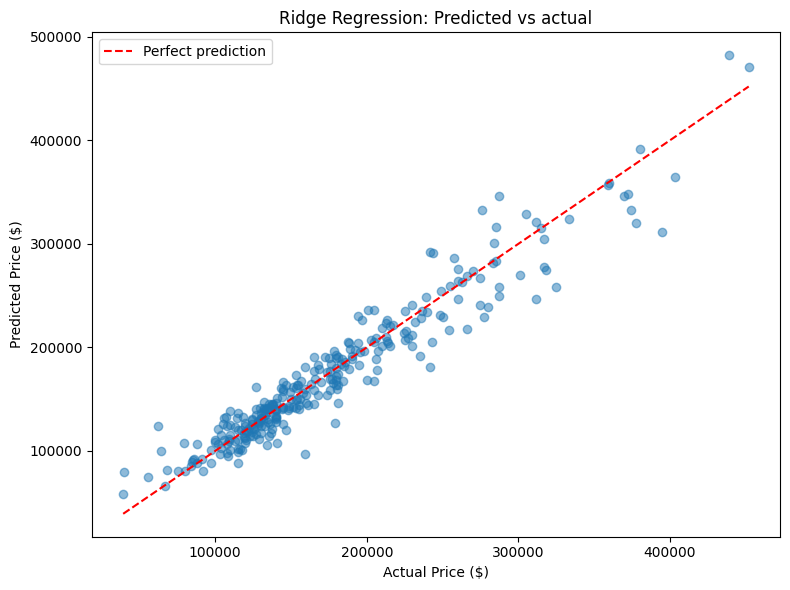

In [32]:
# Prediction vs actual
plt.figure(figsize=(8,6))
plt.scatter(y_test_real, predictions_dict['ridge_regression'], alpha=0.5)
plt.plot([y_test_real.min(), y_test_real.max()], [y_test_real.min(), y_test_real.max()],
         'r--', label='Perfect prediction')
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.title('Ridge Regression: Predicted vs actual')
plt.legend()
plt.tight_layout()
plt.savefig('figures/predictions_vs_actual.png', format='png')
plt.show()

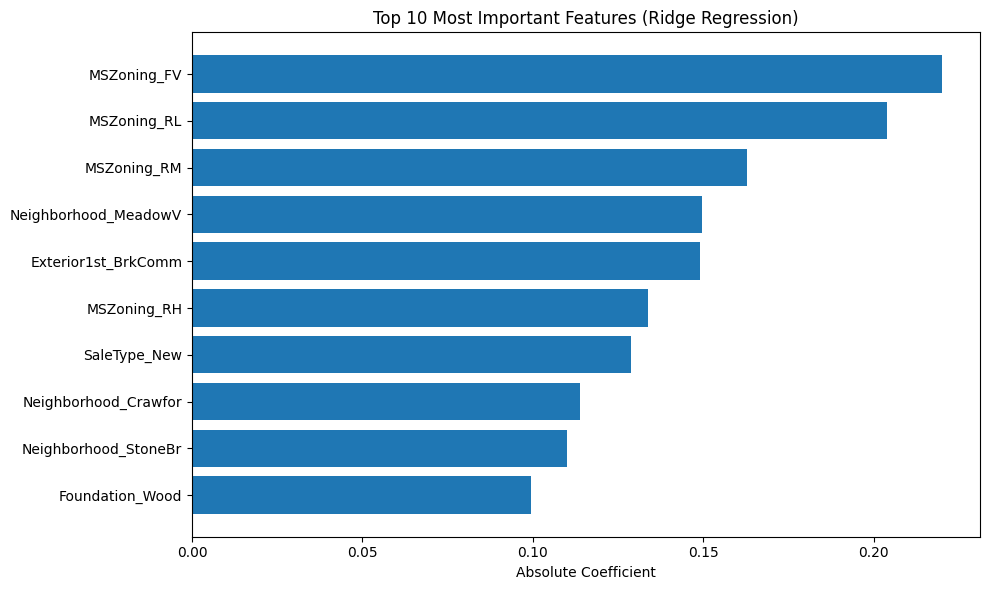

Top 10 features:
             feature  coefficient
         MSZoning_FV     0.220108
         MSZoning_RL     0.203900
         MSZoning_RM     0.162791
Neighborhood_MeadowV     0.149443
 Exterior1st_BrkComm     0.149089
         MSZoning_RH     0.133634
        SaleType_New     0.128748
Neighborhood_Crawfor     0.113815
Neighborhood_StoneBr     0.109943
     Foundation_Wood     0.099502


In [33]:
# === TOP 10 FEATURE IMPORTANCE ===
ridge_model = models['ridge_regression']
coef_df = pd.DataFrame({
    'feature': X_train_scaled.columns,
    'coefficient': np.abs(ridge_model.coef_)
}).sort_values('coefficient', ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.barh(coef_df['feature'], coef_df['coefficient'])
plt.xlabel('Absolute Coefficient')
plt.title('Top 10 Most Important Features (Ridge Regression)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('figures/feature_importance.png')
plt.show()

print("Top 10 features:")
print(coef_df.to_string(index=False))

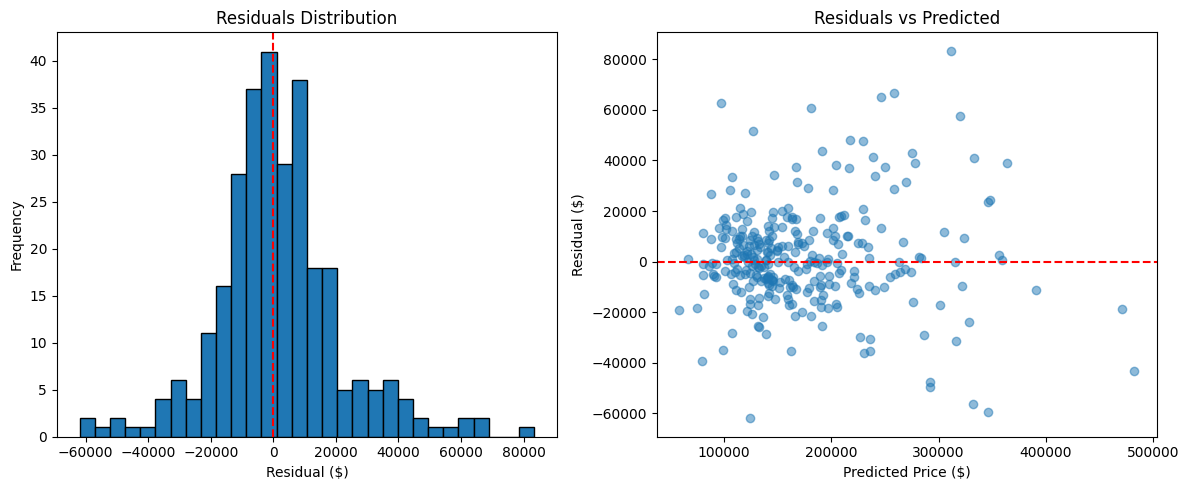

Residuals mean: $1,771
Residuals std: $20,115


In [34]:
# === RESIDUAL ANALYSIS ===
residuals = y_test_real - predictions_dict['ridge_regression']

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Residuals distribution
axes[0].hist(residuals, bins=30, edgecolor='black')
axes[0].axvline(x=0, color='r', linestyle='--')
axes[0].set_xlabel('Residual ($)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Residuals Distribution')

# Residuals vs Predicted
axes[1].scatter(predictions_dict['ridge_regression'], residuals, alpha=0.5)
axes[1].axhline(y=0, color='r', linestyle='--')
axes[1].set_xlabel('Predicted Price ($)')
axes[1].set_ylabel('Residual ($)')
axes[1].set_title('Residuals vs Predicted')

plt.tight_layout()
plt.savefig('figures/residual_analysis.png')
plt.show()

print(f"Residuals mean: ${residuals.mean():,.0f}")
print(f"Residuals std: ${residuals.std():,.0f}")

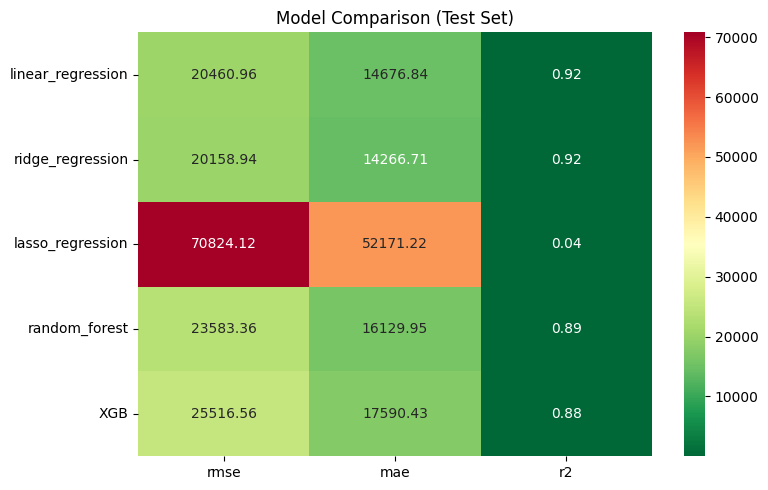

In [35]:
# === MODEL COMPARISON HEATMAP ===
comparison_df = pd.DataFrame(metrics_dict).T
comparison_df = comparison_df[['rmse', 'mae', 'r2']]

fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(comparison_df, annot=True, fmt='.2f', cmap='RdYlGn_r', ax=ax)
ax.set_title('Model Comparison (Test Set)')
plt.tight_layout()
plt.savefig('figures/model_comparison_heatmap.png')
plt.show()

In [36]:
# I want to emulate a production-ready approach so I use `Pipeline` fropm sklearn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import Ridge

# Pipeline che combina scaling + model
ridge_pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('model', Ridge())
])

# Fit su dati non scalati (la pipeline scala internamente)
ridge_pipeline.fit(X_train, y_train)

# Predict
pipeline_predictions_log = ridge_pipeline.predict(X_test)
pipeline_predictions_real = np.expm1(pipeline_predictions_log)

# Verifica che risultati siano uguali
rmse_pipeline = np.sqrt(mean_squared_error(y_test_real, pipeline_predictions_real))
print(f"Pipeline RMSE: ${rmse_pipeline:,.0f}")
print("Pipeline produces same results - ready for production")

Pipeline RMSE: $20,159
Pipeline produces same results - ready for production


## Model Selection

Based on the previous results, the best model is `Ridge Regression` which gives the best results. This is quite strange since more sophisitcated models are performing worse but here my considerations:
- the simple the better
- we can tune `XGB` model or another to reach better performance but hyperparameter tuning is out-of-scope for this project.

Selected model: `RidgeRegression`.

In [42]:
import joblib
os.makedirs('models', exist_ok=True)

# Model and scaler
joblib.dump(models['ridge_regression'], 'models/ridge_model.pkl')
joblib.dump(scaler, 'models/scaler.pkl')

# Final columns
joblib.dump(X_train.columns.tolist(), 'models/feature_columns.pkl')

joblib.dump(lot_frontage_median, 'models/lot_frontage_median.pkl')

joblib.dump(electrical_mode, 'models/electrical_mode.pkl')

print("✅ All artifacts saved")

✅ All artifacts saved
